### Libraries

In [120]:
import pandas  as pd
import numpy   as np
import seaborn as sns
import matplotlib.pyplot as plt
from backtesting import Strategy
from backtesting import Backtest
from backtesting.test import SMA
from backtesting.lib  import crossover
from datetime    import datetime

### OHLC data and EDA

In [121]:
# read in csv data
df = pd.read_csv("EURUSD_Daily_201201020000_202112310000.csv",sep="\t")
# create 'date' columns as datetime obj
df['date'] = pd.to_datetime(df['<DATE>'])
# drop unwanted columns
df.drop(columns=['<DATE>','<TICKVOL>','<VOL>', '<SPREAD>'], inplace=True)
# rename columns
df.columns = ['open','high','low','close','date']
# set date as index 
df.set_index('date', inplace=True)
df.shape

(2661, 4)

### TRIMA

In [122]:
class SmaCross(Strategy):
    n1 = 21
    n2 = 50
    n3 = 100
        
    def init(self):
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
        self.sma3 = self.I(SMA, self.data.Close, self.n3)
        
    def next(self):
        
        if self.sma1 > self.sma2 > self.sma3:
            if crossover(self.sma1,self.sma3):
                self.position.close()
                self.buy(tp=self.data.Close + 1000e-4,
                         sl=self.data.Close - 500e-4)
                        
        elif self.sma1 < self.sma2 < self.sma3:
            if crossover(self.sma3, self.sma1):
                self.position.close()
                self.sell(tp=self.data.Close - 500e-4,
                          sl=self.data.Close + 1000e-4)

In [123]:
# rename to match Backtesting library
df.columns = ['Open', 'High', 'Low', 'Close']
backtest = Backtest(df, SmaCross, cash=10000,commission=.002)
stats, heatmap = backtest.optimize(
    n1=range(10, 50, 10),
    n2=range(50, 100, 10),
    n3=range(100, 201, 10),
    maximize='Return [%]',
    return_heatmap=True)

  0%|          | 0/17 [00:00<?, ?it/s]

In [124]:
stats

Start                     2012-01-02 00:00:00
End                       2021-12-31 00:00:00
Duration                   3651 days 00:00:00
Exposure Time [%]                    4.547163
Equity Final [$]                 11377.672373
Equity Peak [$]                  11377.672373
Return [%]                          13.776724
Buy & Hold Return [%]              -12.113996
Return (Ann.) [%]                    1.229788
Volatility (Ann.) [%]                1.592909
Sharpe Ratio                         0.772039
Sortino Ratio                        1.538401
Calmar Ratio                         0.485155
Max. Drawdown [%]                   -2.534836
Avg. Drawdown [%]                   -0.753739
Max. Drawdown Duration       28 days 00:00:00
Avg. Drawdown Duration        9 days 00:00:00
# Trades                                    2
Win Rate [%]                            100.0
Best Trade [%]                       9.057444
Worst Trade [%]                      4.328165
Avg. Trade [%]                    

In [125]:
# best params
stats[27]

<Strategy SmaCross(n1=20,n2=60,n3=100)>

In [126]:
hm1 = heatmap.groupby(['n1','n2']).mean().unstack()
hm2 = heatmap.groupby(['n1','n3']).mean().unstack()
hm3 = heatmap.groupby(['n2','n3']).mean().unstack()

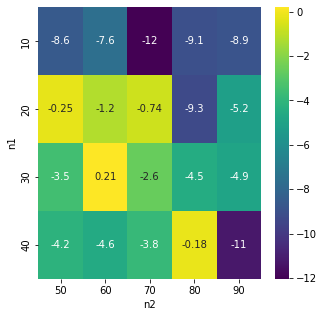

In [127]:
plt.figure(figsize=(5,5))
sns.heatmap(hm1, cmap='viridis', annot=True);

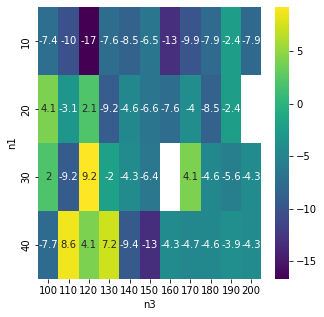

In [128]:
plt.figure(figsize=(5,5))
sns.heatmap(hm2, cmap='viridis', annot=True);

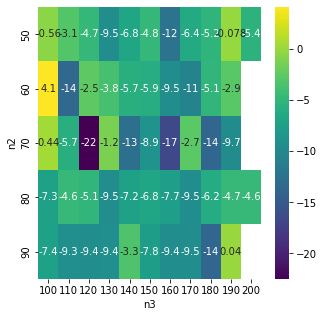

In [129]:
plt.figure(figsize=(5,5))
sns.heatmap(hm3, cmap='viridis', annot=True);

In [130]:
backtest.plot()

Row(id='9262', ...)

### DUOMA

In [131]:
class SmaCross(Strategy):
    n1 = 21
    n2 = 50
   
        
    def init(self):
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
        
        
    def next(self):
        
        if self.sma1 > self.sma2:
            if crossover(self.sma1,self.sma2):
                self.position.close()
                self.buy(tp=self.data.Close + 1000e-4,
                         sl=self.data.Close - 500e-4)
                        
        elif self.sma1 < self.sma2:
            if crossover(self.sma2, self.sma1):
                self.position.close()
                self.sell(tp=self.data.Close - 1000e-4,
                          sl=self.data.Close + 500e-4)

In [132]:
# rename to match Backtesting library
df.columns = ['Open', 'High', 'Low', 'Close']
backtest = Backtest(df, SmaCross, cash=10000,commission=.002)
stats, heatmap = backtest.optimize(
    n1=range(10, 50, 10),
    n2=range(50, 100, 10),
    maximize='Return [%]',
    return_heatmap=True)

  0%|          | 0/20 [00:00<?, ?it/s]

In [133]:
stats

Start                     2012-01-02 00:00:00
End                       2021-12-31 00:00:00
Duration                   3651 days 00:00:00
Exposure Time [%]                   82.337467
Equity Final [$]                 12260.846414
Equity Peak [$]                  13085.736691
Return [%]                          22.608464
Buy & Hold Return [%]              -12.113996
Return (Ann.) [%]                    1.949006
Volatility (Ann.) [%]                6.326882
Sharpe Ratio                         0.308052
Sortino Ratio                         0.45535
Calmar Ratio                         0.132456
Max. Drawdown [%]                  -14.714421
Avg. Drawdown [%]                   -1.833841
Max. Drawdown Duration     1192 days 00:00:00
Avg. Drawdown Duration       90 days 00:00:00
# Trades                                   39
Win Rate [%]                        43.589744
Best Trade [%]                       9.156452
Worst Trade [%]                     -4.807199
Avg. Trade [%]                    

In [134]:
stats[27]

<Strategy SmaCross(n1=30,n2=70)>

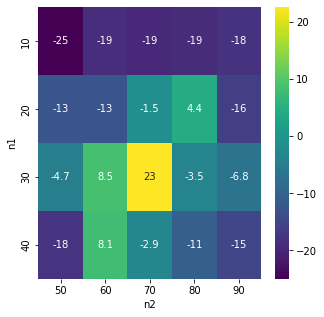

In [136]:
hm = heatmap.groupby(['n1','n2']).mean().unstack()
plt.figure(figsize=(5,5))
sns.heatmap(hm, cmap='viridis', annot=True);